In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data
Prepare

In [34]:
# Set random seed for reporducibility
torch.manual_seed(114514)
np.random.seed(114514)

# Generate Synthetic dataset
n_train = 1000
n_test = 10
n_features = 2 # 2-dimensions
n_classes = 3  # 3-classes

# Mean values for each cluster
mean1 = [2, 2]
mean2 = [7, 7]
mean3 = [12, 2]

# Identity covariance matrix: How the points varies
conv = [[1.5, 0], [0, 1.5]]

Generate training data

In [35]:
# Generate tarining data
X_train_1 = np.random.multivariate_normal(mean1, conv, n_train)
X_train_2 = np.random.multivariate_normal(mean2, conv, n_train)
X_train_3 = np.random.multivariate_normal(mean3, conv, n_train)

X_train = np.vstack((X_train_1, X_train_2, X_train_3)) # Vertically stack training samples
y_train = np.hstack((np.zeros(n_train), np.ones(n_train), np.full(n_train,2))) # Horizontally stack results

Generate test data

In [36]:
X_test_1 = np.random.multivariate_normal(mean1, conv, n_test)
X_test_2 = np.random.multivariate_normal(mean2, conv, n_test)
X_test_3 = np.random.multivariate_normal(mean3, conv, n_test)

X_test = np.vstack((X_test_1, X_test_2, X_test_3))
y_test = np.hstack((np.zeros(n_test), np.ones(n_test), np.full(n_test,2)))

In [45]:
y_test.shape

(30,)

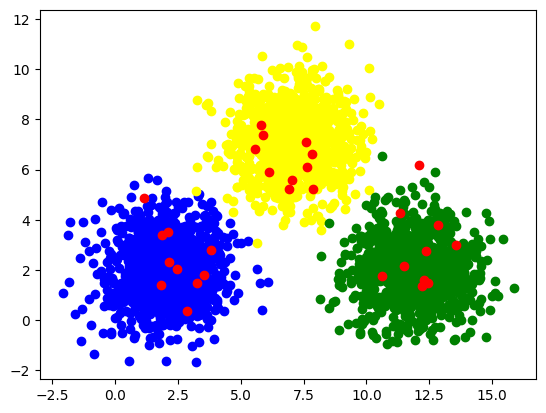

In [37]:
plt.scatter([xtr[0] for xtr in X_train_1], [xtr[1] for xtr in X_train_1], color='blue', label='dataset 1')
plt.scatter([xtr[0] for xtr in X_train_2], [xtr[1] for xtr in X_train_2], color='yellow', label='dataset 1')
plt.scatter([xtr[0] for xtr in X_train_3], [xtr[1] for xtr in X_train_3], color='green', label='dataset 1')
plt.scatter([xts[0] for xts in X_test], [xts[1] for xts in X_test], color='red')
plt.show()

In [38]:
# Convert dat to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create Model

In [39]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # fc stands for fully-connected
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [40]:
# Model Hyper-Parameters
input_size = 2    # 2-d input
hidden_size = 10  # size of hidden layer
output_size = 3   # 3 classes
learning_rate = 0.01
num_epochs = 100

# Initialize: Model, Loss Function, Optimizer
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
# Start Training
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    logits = model(X_train_tensor)
    loss = criterion(logits, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.4725
Epoch [20/100], Loss: 0.3056
Epoch [30/100], Loss: 0.2058
Epoch [40/100], Loss: 0.1338
Epoch [50/100], Loss: 0.0784
Epoch [60/100], Loss: 0.0429
Epoch [70/100], Loss: 0.0286
Epoch [80/100], Loss: 0.0225
Epoch [90/100], Loss: 0.0189
Epoch [100/100], Loss: 0.0169


In [47]:
logits = model(X_train_tensor)
logits.shape

torch.Size([3000, 3])

In [42]:
# Evaluate the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predicted = torch.argmax(train_outputs, dim=1)
    train_accuracy = (train_predicted == y_train_tensor).float().mean()

    test_outputs = model(X_test_tensor)
    test_predicted = torch.argmax(test_outputs, dim=1)
    test_accuracy = (test_predicted == y_test_tensor).float().mean()

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9983
Test Accuracy: 0.9667


Visualize Prediciton Results

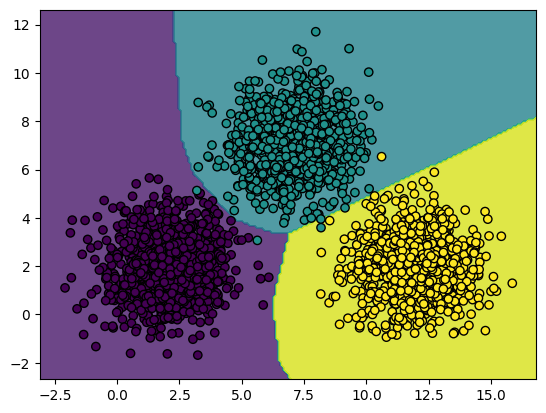

In [43]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        Z = model(grid_tensor)
        Z = torch.argmax(Z, dim=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()
    
# Plot decision boundary with training data
plot_decision_boundary(X_train, y_train, model)